In [1]:
import classes as cl
import network
import travel_time as travel
import partitioning as pa
import simulated_annealing as sa
import numpy as np
import plot

In [2]:
"Network Construction"

n = 15      # weight of the grid
m = 15      # height of the grid  
e = 5       # number of of existing PHCs
p = 10       # number of possible PHCs
p_min = 40  # min population of a block
p_max = 80  # max population of a block
d_b = 5     # distance from a block to a block or stop
d_s = 3     # distance between consecutive stops


grid, V_stops, V_blocks, V_existing, V_possible, all_facilities, pop, total_pop = network.create_grid(n, m, e, p, p_min, p_max, d_b, d_s)

print("Total Population: ", np.sum(pop))

Total Population:  11765


In [3]:
"Travel Time"

for source in all_facilities.keys():
    travel_to_source = travel.travel_time_to_source(grid, source)
travel2 = travel.travel_time(grid, V_existing, V_possible)

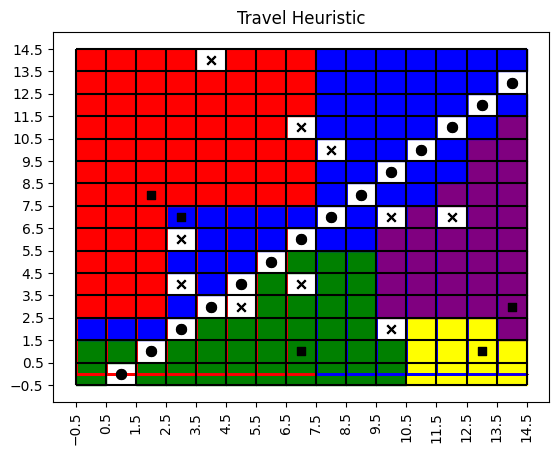

In [4]:
import heuristic as heu

locations = V_existing

location, allocation = heu.assignment_travel(V_blocks, all_facilities, locations, travel2)

plot.plot(m, n, V_blocks, V_existing, V_possible, V_stops, location, allocation, "Travel Heuristic")

In [5]:
"""Multi-way Set Partitioning"

time = 10  # Stops searching after 10 seconds and provides the best solution of that moment.

objective_value, set_weights, partitioning = pa.multiway_number_partitioning(V_blocks, V_existing, time)

print(objective_value)
print(set_weights)



# 1) add time 90 as a variable to simulated annealing. When we call simulated annealing, it should be correlated.
# 2) Should we get lists instead of dictionaries? We will not need to convert them to a list in partitioning, simulated an.
#    simulated annealing is turned to lists. Make changes everywhere. all_facilities in SA can be also defined in the main.
# 3) We should increase p to 10."""

'Multi-way Set Partitioning"\n\ntime = 10  # Stops searching after 10 seconds and provides the best solution of that moment.\n\nobjective_value, set_weights, partitioning = pa.multiway_number_partitioning(V_blocks, V_existing, time)\n\nprint(objective_value)\nprint(set_weights)\n\n\n\n# 1) add time 90 as a variable to simulated annealing. When we call simulated annealing, it should be correlated.\n# 2) Should we get lists instead of dictionaries? We will not need to convert them to a list in partitioning, simulated an.\n#    simulated annealing is turned to lists. Make changes everywhere. all_facilities in SA can be also defined in the main.\n# 3) We should increase p to 10.'

In [6]:
def network_details():
    return grid, V_stops, V_blocks, V_existing, V_possible, pop, all_facilities, total_pop, travel2

def parameters():
    return n, m, e, p, p_min, p_max, d_b, d_s